In [1]:
# Lees software in
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import math

Using matplotlib backend: agg


In [2]:
# Ze de data klaar
data = """
leerling,geslacht,leeftijd,lengte,reistijd,youtube,insta_snap,\
tel_netflix,huiswerk,slapen,wiskunde_cijfer
1,man,15,170,60,180,120,60,30,9,7
2,man,14,180,8,45,210,60,0,6,6
3,man,14,170,18,120,60,0,60,8,6
4,man,15,165,10,180,180,60,60,9,5
5,vrouw,14,155,15,60,120,420,0,8,4
6,man,14,170,20,60,540,180,30,6,7
7,vrouw,14,176,10,0,420,60,15,8,7
8,vrouw,15,173,10,30,360,120,0,7,7
9,man,15,185,30,120,300,0,20,6,5
10,man,14,162,45,300,120,0,30,7,7
11,man,15,185,30,20,10,0,30,7,8
12,man,15,178,30,60,120,0,0,6,7
13,man,15,170,25,60,120,0,30,8,6
14,man,14,177,5,240,150,60,90,9,4
15,man,15,186,10,60,15,0,30,7,7
16,man,14,188,15,0,60,60,0,8,5
17,man,14,195,8,120,120,180,120,8,7
18,vrouw,15,161,10,0,0,240,60,6,7
19,vrouw,15,168,30,180,60,120,120,8,7
20,man,14,180,15,60,60,40,30,8,9
21,vrouw,14,155,12,180,120,180,120,8,6
22,vrouw,14,174,18,40,540,120,120,10,7
"""

In [3]:
# Lees data in
klas = pd.read_csv(StringIO(data))
klas.head(5) # geef de 5 eerste regels

,leerling,geslacht,leeftijd,lengte,reistijd,youtube,insta_snap,tel_netflix,huiswerk,slapen,wiskunde_cijfer
0,1,man,15,170,60,180,120,60,30,9,7
1,2,man,14,180,8,45,210,60,0,6,6
2,3,man,14,170,18,120,60,0,60,8,6
3,4,man,15,165,10,180,180,60,60,9,5
4,5,vrouw,14,155,15,60,120,420,0,8,4


In [4]:
# Opdracht 1: Telling of steekproef

# Het is door middel van een telling omdat iedereen uit de klas in het tabel staat, en niet maar een paar leerlingen.

In [5]:
# Opdracht 2: Wat is de gemiddelde leeftijd van de leerlingen in jouw klas? Rond af op 1 decimaal
klas['leeftijd'].mean().round(1)

14.5

In [6]:
# Opdracht 3: Welke leeftijd is de modus en waarom?

# De modus is de leeftijd die het meeste voorkomt. Voor deze klas is dat: 14
klas['leeftijd'].mode()[0]

14

In [7]:
# Of de modus voor all kolommen
klas.mode().iloc[0,:]

leerling               1
geslacht             man
leeftijd            14.0
lengte             170.0
reistijd            10.0
youtube             60.0
insta_snap         120.0
tel_netflix          0.0
huiswerk            30.0
slapen               8.0
wiskunde_cijfer      7.0
Name: 0, dtype: object

In [8]:
# Opdracht 4: Welke leeftijd is de mediaan:

# stap 1: zet alle leeftijden achter elkaar in volgorde (laag naar hoog)
leeftijden = klas['leeftijd'].sort_values().tolist()

# stap 2: neem het middelste getal
middelste_getal = leeftijden[math.floor(len(leeftijden)/2)]

f"4: Mediaan is {middelste_getal}, of zonder extra stappen {int(klas['leeftijd'].median())}"

'4: Mediaan is 14, of zonder extra stappen 14'

In [9]:
# Opdracht 5a: Maak een frequentietabel van de lengtes
def lengte_group(l):
    
    lg = 150
    if l >= 155 and l < 160: lg = 155
    if l >= 160 and l < 165: lg = 160
    if l >= 165 and l < 170: lg = 165
    if l >= 170 and l < 175: lg = 170
    if l >= 175 and l < 180: lg = 175        
    if l >= 180 and l < 185: lg = 180
    if l >= 185 and l < 190: lg = 185
    if l >= 190 and l < 195: lg = 190        
    if l >= 195: lg = 195        
        
    return lg
        
klas['lengte_groep'] = klas['lengte'].apply(lambda x: lengte_group(x))
freq = pd.crosstab(index=klas['lengte_groep'], columns='aantal')
freq = freq.reset_index() # maak lengte_groep weer een kolom, in plaats van de index
freq

col_0,lengte_groep,aantal
0,155,2
1,160,2
2,165,2
3,170,6
4,175,3
5,180,2
6,185,4
7,195,1


In [10]:
# Opdracht 5b: met klassenmiddens
# klassenmiddens = (ondergrens + bovengrens) / 2
ondergrens = freq['lengte_groep'].min()
bovengrens = freq['lengte_groep'].max()
klassenmidden = (ondergrens + bovengrens) / 2
klassenmidden

175.0

In [11]:
# Opdracht 5c: met gewogen gemiddelde

# geeft gewicht aan de lengte door deze met het aantal te vermenigvuldigen
freq['lengte_opgeteld'] = freq['lengte_groep'] * freq['aantal']

# bepaal de som van alle lengtes, en het aantal personen in de klas
som_lengte = freq['lengte_opgeteld'].sum()
som_aantal = freq['aantal'].sum()

# bepaal het gewogen gemiddelde
gewogen_gemiddelde = som_lengte/som_aantal
gewogen_gemiddelde.round(2)

172.73

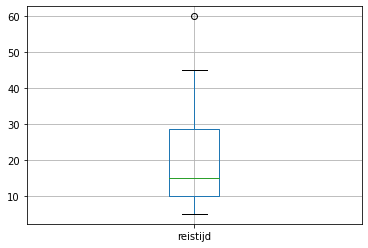

In [12]:
# Opdracht 6: Boxplot reistijd naar school
boxplot = klas.boxplot(column=['reistijd'])

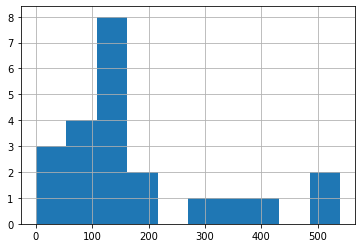

In [13]:
# Opdracht 7: Histogram social media
histogram = klas["insta_snap"].hist()

In [14]:
# Opdracht 8: Staan de meisjes gemiddeld hoger of lager dan de jongens voor Wiskunde?
cijfer_wiskunde_per_geslacht = klas.groupby('geslacht').mean()['wiskunde_cijfer'].reset_index()
cijfer_wiskunde_per_geslacht = cijfer_wiskunde_per_geslacht.set_index('geslacht')

print(f"De jongens staan net iets lager gemiddeld voor Wiskunde dan de meisjes!")
cijfer_wiskunde_per_geslacht

De jongens staan net iets lager gemiddeld voor Wiskunde dan de meisjes!


,wiskunde_cijfer
geslacht,
man,6.400000
vrouw,6.428571


In [15]:
 # Opdracht 9: Verklaar het verschil tussen meisjes en jongen
huiswerk_per_geslacht = klas.groupby('geslacht').mean()['huiswerk']

print(f"""Omdat de meisjes \
{round(huiswerk_per_geslacht['vrouw'] - huiswerk_per_geslacht['man'],2)} \
minuten gemiddeld meer tijd aan hun huiswerk besteden!""")

huiswerk_per_geslacht.reset_index()

Omdat de meisjes 24.81 minuten gemiddeld meer tijd aan hun huiswerk besteden!


,geslacht,huiswerk
0,man,37.333333
1,vrouw,62.142857


# Extra vragen op basis van de tabel!

In [16]:
# Opdracht 10 (voorbereiding)
tijd_kolommen = ['reistijd','youtube','insta_snap','tel_netflix','huiswerk','slapen']

# maak procent tabel
klas_besteding_tijd = klas[
    ['leerling','reistijd','youtube','insta_snap','tel_netflix','huiswerk','slapen']
].copy()

# slapen omzetten naar minuten!
klas_besteding_tijd['slapen'] = klas_besteding_tijd['slapen'].apply(lambda x: x * 60)

# bereken de totale tijd per dag aan activiteiten om het percentage te kunnen berekenen
klas_besteding_tijd['totale_tijd'] = klas_besteding_tijd[tijd_kolommen].sum(axis=1)

klas_besteding_tijd.head(5) # geef de 5 eerste regels

,leerling,reistijd,youtube,insta_snap,tel_netflix,huiswerk,slapen,totale_tijd
0,1,60,180,120,60,30,540,990
1,2,8,45,210,60,0,360,683
2,3,18,120,60,0,60,480,738
3,4,10,180,180,60,60,540,1030
4,5,15,60,120,420,0,480,1095


In [17]:
# Opdracht 10a: Wat is het gemiddelde percentage besteding van tijd aan Youtube van de leerlingen
klas_besteding_tijd['youtube_percentage'] = klas_besteding_tijd.apply(
    lambda x: 
        round(
            x['youtube']/x['totale_tijd']*100,1 # tijd youtube / totale tijd * 100 is percentage
        ), axis=1
)
f"""De leerlingen kijken gemiddeld \
{klas_besteding_tijd['youtube_percentage'].mean().round(1)}% \
van hun tijd naar Youtube!"""

'De leerlingen kijken gemiddeld 10.6% van hun tijd naar Youtube!'

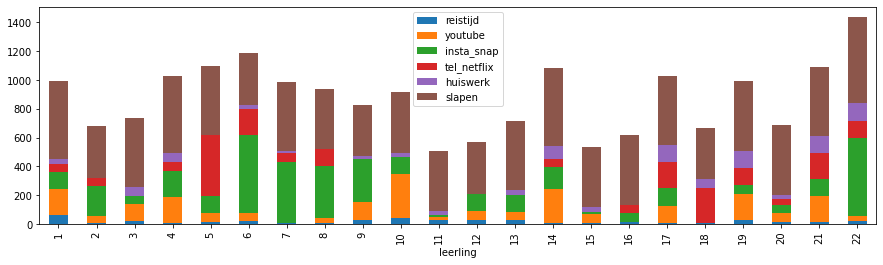

In [18]:
# Opdracht 10b: Verdeling van tijd per leerling als bar plot
fig = plt.figure(figsize = (15,4))
ax = fig.gca()
bar_plot = klas_besteding_tijd[
    ['leerling','reistijd','youtube','insta_snap','tel_netflix','huiswerk','slapen']
].plot.bar(x='leerling', stacked=True, ax = ax)

In [19]:
# Opdracht 10c: hoeveel uur televisie en netflix kijken de leerlingen samen?
tel_netflix_totaal = round( # rond af...
        klas_besteding_tijd['tel_netflix'].sum() / 60 
    , 0) # op 0 cijfers achter de komma

f"""De leerlingen kijken samen ongeveer {int(tel_netflix_totaal)} uur televisie en Netflix per dag! \
Dat is gemiddeld {round(tel_netflix_totaal / len(klas_besteding_tijd),1)} uur televisie en Netflix per leerling!"""

'De leerlingen kijken samen ongeveer 33 uur televisie en Netflix per dag! Dat is gemiddeld 1.5 uur televisie en Netflix per leerling!'